# Assignment 

In this assignment, we will creating a __Nearest Neighbors__ algorithm which find the closest (or nearest) known observation in our training data and use that value to make our prediction. Similar to a classifier, the interest outcome is category. 

To find which observation is "nearest" we need some kind of way to measure distance. Typically we use _Euclidean distance_, the standard distance measure that you're familiar with from geometry. With one observation in n-dimensions $(x_1, x_2, ...,x_n)$ and the other $(w_1, w_2,...,w_n)$:

$$ \sqrt{(x_1-w_1)^2 + (x_2-w_2)^2+...+(x_n-w_n)^2} $$

In [1]:
# Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

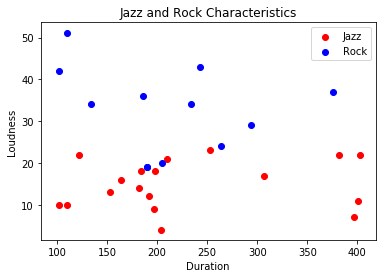

In [2]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

In [3]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[24, 190]])

array([0])

The model (k=1) predicts that the point ('loudness': 24, 'duration': 190) is a rock song, because the closest known sample to that point is a rock song.

Now we'll increase k to 5. The model will implicitly assign probabilities for each label_class and use the most probable label_class as it prediction for a given point.

In [4]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))

[1]
[[0.4 0.6]]


Now our test prediction has changed. In using the five nearest neighbors it appears that there were two votes for rock and three for jazz, so it was classified as a jazz song. This is different than our simpler Nearest Neighbors model. While the closest observation was in fact rock, there are more jazz songs in the nearest  𝑘  neighbors than rock.

We can visualize our decision bounds with something called a mesh.

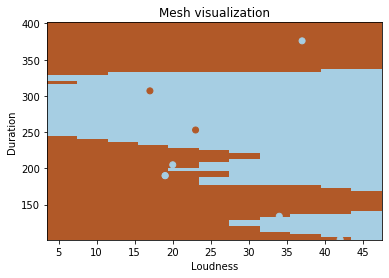

In [5]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 4.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

Looking at the visualization above, any new point that fell within a blue area would be predicted to be jazz, and any point that fell within a brown area would be predicted to be rock.

The boundaries above are strangely jagged here. Increasing the k value will smooth out the jagged ridges.

## Challenge: Implement the Nearest Neighbor algorithm 

The Nearest Neighbor algorithm is extremely simple. So simple, in fact, that we will build it yourself from scratch using the Python.

First, we will calculate the distance between test data and each row of training data by using the Eclidean distance formula. 

In [6]:
#Euclidean Distance function.

def euclidean_dist(test, train):
    #test and train are n x m arrays
    distances = []
    # Calculating euclidean distance between each row of training data and test data
    for i in range(len(test)):
        distance = np.sqrt(np.sum(np.square(test[i] - train), axis=1))
        distances.append(distance)
    return distances

In [7]:
train = X
#X is 30 x 2
test = [[140, 30], [20,30]]
Y_test = [1, 1]
#test is 2 x 2

euclidean_dist(test, train)

[array([196.46882704, 148.49915825, 234.04700383, 187.48866632,
        149.62620091, 212.24985277, 286.38610301, 371.25193602,
        148.60686391, 261.17427132, 212.19095174, 152.64337522,
        303.0808473 , 119.67038063, 390.35624755, 176.79932127,
        200.60159521, 206.46549348, 215.77998054, 391.21988702,
        182.57053431, 207.62466135, 220.84383623, 251.82930727,
        229.89562849, 200.60159521, 197.43353312, 392.78747434,
        361.00554012, 121.60592091]),
 array([154.01298647, 104.93807698, 214.23818521, 156.81836627,
         92.02173656, 167.36188335, 264.15336454, 352.00568177,
         72.69112738, 234.03418554, 175.        ,  80.62257748,
        277.01624501,  85.79627032, 367.23017305, 123.19902597,
        160.00312497, 162.19741058, 180.00277776, 373.00536189,
        134.0596882 , 168.01190434, 174.73408368, 223.02017846,
        204.47982786, 160.00312497, 152.11837496, 371.10914836,
        346.41737832,  75.2861209 ])]

Next, we will get top k rows from the sorted array.

In [8]:
# Get neighbors

def get_neighbors(X_train, X_test, Y_train, k):
    neighbors_arrays = npargsort.(euclidean_dist(X_test, X_train))
    votes = []
    # Extracting top k neighbors
    for item in neighbors_arrays:
        targs = []
        for i in range(k):
            index = item[i]
            targs.append(Y_train[index])
        votes.append(np.median(targs))
    return(votes)

In [9]:
print(get_neighbors(train, test, Y, 3))

[0.0, 1.0]


Finally, we will get the most frequent class of these rows and return predicted class.

In [10]:
# KNN class 

def knn_class(X_train, X_test, Y_train, Y_test, k):
    predictions = pd.DataFrame(get_neighbors(X_train, X_test, Y_train, k), index=X_test, columns=['prediction'])
    predictions['target'] = Y_test
    return(predictions)

In [11]:
knn_class(train, test, Y, Y_test, 3)

,,prediction,target
140,20,0.0,1
30,30,1.0,1
